# Buat Koneksi ke DB:  conda install -c anaconda sqlalchemy

Sebelum melakukan koneksi, kita harus meng-install sqlalchemy melalui perintah:


In [11]:
import pymysql
import pandas as pd
from sqlalchemy import create_engine

host = 'localhost'
port = '3306'
username = 'root'
password = ''
database = 'classicmodels'

# Create Connection to database
engine = create_engine('mysql+pymysql://'+username+':'+password+'@'+host+':'+port+'/'+database)
'''engine = create_engine('mysql+pymysql://root: @localhost:3306/academic')'''

def run(sql):
    df = pd.read_sql_query(sql, engine)
    return df

# Konversi CSV ke DataFrame

In [12]:
# CSV to DataFrame to MySQL
df_fromcsv = pd.read_csv('a_mahasiswa.csv')
df_fromcsv.to_sql(name = 'mahasiswa', con = engine, if_exists = 'append', index = False) 
#if_exists = 'fail' | 'replace' | 'append'

# Baca Data dalam tabel

In [3]:
# Select all mahasiswa data using run function (pandas)
# data in dataframe type
df_results = run("SELECT * FROM mahasiswa")
print(df_results)

   ID   Nama
0  11    ANI
1  22   BUDI
2  33  CITRA
3  44  DAMAR
4  55   ESTI


# Lakukan penambahan Data dengan Query INSERT

In [25]:
# Insert with Autocommit
engine.execute("INSERT INTO mahasiswa VALUES(66, 'FAJAR')")

##  *Insert dengan variabel

In [31]:
# Insert with Autocommit
id_mhs = '77'
nama_mhs = 'GILANG'
engine.execute("INSERT INTO mahasiswa VALUES("+id_mhs+", '"+nama_mhs+"')")

# UPDATE data

In [17]:
# Update with Autocommit
engine.execute("UPDATE mahasiswa SET Nama = 'Sawabi Zurich Hidayatulloh' WHERE ID=4")

# DELETE

In [27]:
# Delete with Autocommit
engine.execute("DELETE FROM mahasiswa WHERE ID=4")

# Data dalam bentuk Tupple

In [11]:
# Select all mahasiswa data using sqlalchemy
# data in tupple type
t_results = engine.execute("SELECT * FROM mahasiswa").fetchall()
print(t_results)

[(11, 'ANI'), (22, 'BUDI'), (33, 'CITRA'), (44, 'DAMAR'), (55, 'ESTI')]


In [12]:
# Select only one to row mahasiswa data using sqlalchemy
# data in tupple type
t_one_result = engine.execute("SELECT * FROM mahasiswa").fetchone()
print(t_one_result)

(11, 'ANI')


# EXPORT Dataframe ke CSV

In [14]:
# Export DataFrame consist mahasiswa data to CSV
df_results.to_csv('dftocsv_mahasiswa.csv', index=False)

# SUBQUERY

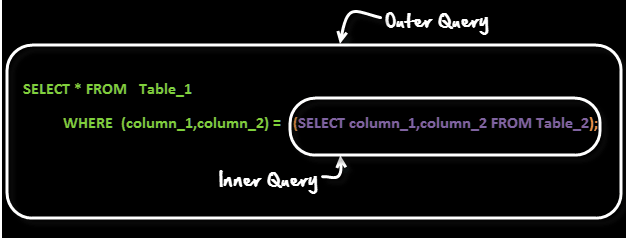

In [7]:
run("SELECT customerNumber from payments where amount = (Select MAX(amount) from payments)")

,customerNumber
0,141


In [10]:
run("""
SELECT
    customerName
FROM 
    customers
WHERE 
    customerNumber = 
    (SELECT customerNumber from payments where amount = (Select MAX(amount) from payments))""")

,customerName
0,Euro+ Shopping Channel
